In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import pandas as pd
import os  
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import plotly as plt
import random

2023-08-28 13:42:33.817012: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-08-28 13:42:33.817049: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df_all = pd.read_csv("/project/MERGED.csv")

In [3]:
df = df_all.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 36 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Brief Name                                          251 non-null    object 
 1   Client                                              251 non-null    object 
 2   Shortlisted Agency                                  251 non-null    object 
 3   Agency Skills                                       210 non-null    object 
 4   Agency Industries                                   210 non-null    object 
 5   Service Description                                 220 non-null    object 
 6   Agency Description                                  226 non-null    object 
 7   Agency services                                     226 non-null    object 
 8   Other Services                                      155 non-null    object 
 9  

In [5]:
columns_to_drop = [
    "Match Score",
    "Lead_George Patten",
    "Lead_Gideon Hyde",
    "Lead_Hannah Fraser",
    "Lead_Kate Walker",
    "Lead_Paul Bowman",
    "Lead_Peter Sayburn",
    "Lead_Phil Kohler",
    "Lead_Robin Scarborough",
    "Number of Agencies Shortlisted Brief", 
    "Client_WA_Interaction",'Service Description',
    'Agency Description', 'Agency services', 'Other Services',
    'Vision', 'Industry Experience', 'Status', 'Winning Agency', 
    "Project extension with same agency",
    "Client selected agency themselves from marketplace",
    "Right geography / time zone",
    "Strong skill set match",
    "Deep / relevant sector expertise",
    "Good cultural fit",
    "Right price level",
    "Strong track record"
]

df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Brief Name           251 non-null    object
 1   Client               251 non-null    object
 2   Shortlisted Agency   251 non-null    object
 3   Agency Skills        210 non-null    object
 4   Agency Industries    210 non-null    object
 5   Agency Locations     235 non-null    object
 6   Brief Region         251 non-null    object
 7   Sub Brief Taxonomy   250 non-null    object
 8   Main Brief Taxonomy  250 non-null    object
dtypes: object(9)
memory usage: 17.8+ KB


In [6]:
# List of columns to be encoded
columns_to_encode = [
    "Sub Brief Taxonomy",
    "Main Brief Taxonomy",
    "Agency Skills",
    "Agency Industries"
]

# Drop rows with NaN in the specified columns
df = df.dropna(subset=columns_to_encode)

# Select specific columns
subset = df[[ "Sub Brief Taxonomy",
    "Main Brief Taxonomy",
    "Agency Skills",
    "Agency Industries"]]

# Print the subset
subset

,Sub Brief Taxonomy,Main Brief Taxonomy,Agency Skills,Agency Industries
0,"(PR), (Corporate_Communication)",(Media_Public Relations & Events),"(Copywriting), (PR)",(Professional_Services)
1,"(PR), (Corporate_Communication)",(Media_Public Relations & Events),"(Brand_Strategy), (Copywriting), (Corporate_Co...","(Administrative_and_Support_Services), (Alcoho..."
2,(Video_Production),"(Production Services), (Advertising_Brand & Cr...","(Brand_Design), (Customer_Experience_Design), ...","(Alcoholic_Beverages), (Automotive), (Beauty),..."
3,(Video_Production),"(Production Services), (Advertising_Brand & Cr...","(Brand_Design), (UX_&_UI_Design), (Mobile_App_...",(B2B)
4,(Proposition_Design),(Experience & Design),"(Business_Strategy), (CRM_Strategy), (Customer...","(Alcoholic_Beverages), (Beauty), (Education), ..."
...,...,...,...,...
244,"(Quantitative_Research), (Qualitative_Research)",(Data_Insight & Research),"(Business_Strategy), (Customer_Strategy), (Qua...","(Alcoholic_Beverages), (Beauty), (Construction..."
245,"(Quantitative_Research), (Qualitative_Research)",(Data_Insight & Research),"(Social_Media), (Video_Production)",(B2B)
246,(Social_Media_and_Influencer_Marketing),(Media_Public Relations & Events),"(Data_Analytics), (Advertising), (Brand_Strate...","(Alcoholic_Beverages), (Beauty), (Entertainmen..."
247,(Social_Media_and_Influencer_Marketing),(Media_Public Relations & Events),"(Advertising), (Social_Media), (Creative_Produ...","(Beauty), (Education), (Entertainment), (Fashi..."


## Encoding for Agency Locations and Brief Region

In [7]:
# Display the unique values in 'Agency Locations' and 'Brief Region' columns
print("Unique values in 'Agency Locations':", df['Agency Locations'].unique())
print("Unique values in 'Brief Region':", df['Brief Region'].unique())

# Convert the comma-separated values in 'Agency Locations' into a list of locations
# Replace nan values with empty string before splitting
df['Agency Locations'] = df['Agency Locations'].fillna('')
df['Agency Locations List'] = df['Agency Locations'].str.split(', ')

# Create a binary column for each unique location in 'Agency Locations'
# Using a conditional generator expression to skip nan values
unique_locations = set(location for locations in df['Agency Locations List'] if isinstance(locations, list) for location in locations)
for location in unique_locations:
    df[f'AgencyLocations_{location.strip()}'] = df['Agency Locations List'].apply(lambda x: 1 if location.strip() in x else 0)

# Drop the original 'Agency Locations' and 'Agency Locations List' columns
df = df.drop(columns=['Agency Locations', 'Agency Locations List'])

# Remove trailing white spaces from 'Brief Region'
df['Brief Region'] = df['Brief Region'].str.strip()

# Display the unique values after removing white spaces
print("Unique values in 'Brief Region' after removing white spaces:", df['Brief Region'].unique())

# One hot encode the 'Brief Region' column, prefix the column names, and drop the original column
one_hot_brief = pd.get_dummies(df['Brief Region'], prefix='BriefRegion')
df = pd.concat([df.drop('Brief Region', axis=1), one_hot_brief], axis=1)

df = df.reset_index()
df.head()


Unique values in 'Agency Locations': ['United Kingdom' 'United Kingdom, United States'
 'Australia, United Kingdom, United States' 'Australia'
 'Australia, United Kingdom' 'Australia, United States' 'United States']
Unique values in 'Brief Region': ['united kingdom' 'australia' 'united states']
Unique values in 'Brief Region' after removing white spaces: ['united kingdom' 'australia' 'united states']


,index,Brief Name,Client,Shortlisted Agency,Agency Skills,Agency Industries,Sub Brief Taxonomy,Main Brief Taxonomy,AgencyLocations_United States,AgencyLocations_Australia,AgencyLocations_United Kingdom,BriefRegion_australia,BriefRegion_united kingdom,BriefRegion_united states
0,0,Awards applications x5,AXA,Boost Awards,"(Copywriting), (PR)",(Professional_Services),"(PR), (Corporate_Communication)",(Media_Public Relations & Events),0,0,1,0,1,0
1,1,Awards applications x5,AXA,Reed Words,"(Brand_Strategy), (Copywriting), (Corporate_Co...","(Administrative_and_Support_Services), (Alcoho...","(PR), (Corporate_Communication)",(Media_Public Relations & Events),1,0,1,0,1,0
2,2,Countrywide broker video,AXA,Viewpoint Studios,"(Brand_Design), (Customer_Experience_Design), ...","(Alcoholic_Beverages), (Automotive), (Beauty),...",(Video_Production),"(Production Services), (Advertising_Brand & Cr...",0,0,1,0,1,0
3,3,Countrywide broker video,AXA,Shoreditch Design Studio,"(Brand_Design), (UX_&_UI_Design), (Mobile_App_...",(B2B),(Video_Production),"(Production Services), (Advertising_Brand & Cr...",1,1,1,0,1,0
4,4,Prop Dev (EV and CC Insurance),AXA,Blue Feathers,"(Business_Strategy), (CRM_Strategy), (Customer...","(Alcoholic_Beverages), (Beauty), (Education), ...",(Proposition_Design),(Experience & Design),0,0,1,0,1,0


## Encoding for Agency Skills, Agency Industries, Sub Brief Taxonomy, Main Brief Taxonomy

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

# List of columns to be encoded
columns_to_encode = [
    "Sub Brief Taxonomy",
    "Main Brief Taxonomy",
    "Agency Skills",
    "Agency Industries"
]

# Function to extract values enclosed in parentheses
def extract_labels(s):
    s = s.replace('\t', ',') 
    return re.findall(r'\((.*?)\)', s)

# Preprocess each column and use MultiLabelBinarizer
for column in columns_to_encode:
    # Apply extract_labels to the column
    df[column] = df[column].apply(extract_labels)
    
    # Initialize the MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    
    # Transform the column and create a new DataFrame with the encoded values
    df_encoded = pd.DataFrame(mlb.fit_transform(df[column]), columns=mlb.classes_)
    
    # Optionally, you can add a prefix to the columns to keep track of the original column name
    df_encoded.columns = [f'{column}_{cls}' for cls in df_encoded.columns]
    
    # Concatenate the encoded DataFrame to the original DataFrame
    df = pd.concat([df, df_encoded], axis=1)
    
    # Optionally, you can drop the original column
    df.drop(column, axis=1, inplace=True)


In [9]:
# Print the names of the columns
df.columns

Index(['index', 'Brief Name', 'Client', 'Shortlisted Agency',
       'AgencyLocations_United States', 'AgencyLocations_Australia',
       'AgencyLocations_United Kingdom', 'BriefRegion_australia',
       'BriefRegion_united kingdom', 'BriefRegion_united states',
       ...
       'Agency Industries_Retail', 'Agency Industries_Scale-up',
       'Agency Industries_Start-up',
       'Agency Industries_Supply_Chain_and_Storage',
       'Agency Industries_Technology', 'Agency Industries_Telecommunications',
       'Agency Industries_Transportation',
       'Agency Industries_Travel_and_Tourism', 'Agency Industries_Utilities',
       'Agency Industries_and_Mining'],
      dtype='object', length=188)

In [10]:
df.head()

,index,Brief Name,Client,Shortlisted Agency,AgencyLocations_United States,AgencyLocations_Australia,AgencyLocations_United Kingdom,BriefRegion_australia,BriefRegion_united kingdom,BriefRegion_united states,...,Agency Industries_Retail,Agency Industries_Scale-up,Agency Industries_Start-up,Agency Industries_Supply_Chain_and_Storage,Agency Industries_Technology,Agency Industries_Telecommunications,Agency Industries_Transportation,Agency Industries_Travel_and_Tourism,Agency Industries_Utilities,Agency Industries_and_Mining
0,0,Awards applications x5,AXA,Boost Awards,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Awards applications x5,AXA,Reed Words,1,0,1,0,1,0,...,1,1,1,0,1,1,0,1,1,0
2,2,Countrywide broker video,AXA,Viewpoint Studios,0,0,1,0,1,0,...,1,0,1,1,1,1,1,1,0,1
3,3,Countrywide broker video,AXA,Shoreditch Design Studio,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Prop Dev (EV and CC Insurance),AXA,Blue Feathers,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,1,1


# model 

In [25]:
# Unique brief names
unique_briefs = df['Brief Name'].unique()

# Split the unique brief names into training and test sets
train_briefs, test_briefs = train_test_split(unique_briefs, test_size=0.2, random_state=42)

# Use these splits to split the main dataframe
train_data = df[df['Brief Name'].isin(train_briefs)]
test_data = df[df['Brief Name'].isin(test_briefs)]


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [34]:
# Extracting positive samples for training
X_train_pos = train_data.drop(columns=['index', 'Brief Name', 'Client', 'Shortlisted Agency'])
y_train_pos = [1] * len(train_data)

all_agencies_train = train_data['Shortlisted Agency'].unique()
negative_samples = []

for index, row in train_data.iterrows():
    random_agency = np.random.choice(all_agencies_train)
    while ((train_data['Brief Name'] == row['Brief Name']) & (train_data['Shortlisted Agency'] == random_agency)).any():
        random_agency = np.random.choice(all_agencies_train)
    
    # Check against the entire dataset
    if not ((df['Brief Name'] == row['Brief Name']) & (df['Shortlisted Agency'] == random_agency)).any():
        negative_sample = train_data[(train_data['Shortlisted Agency'] == random_agency) & (train_data['Brief Name'] != row['Brief Name'])].sample(1)
        negative_samples.append(negative_sample)

X_train_neg = pd.concat(negative_samples).drop(columns=['index', 'Brief Name', 'Client', 'Shortlisted Agency'])
y_train_neg = [0] * len(negative_samples)


In [43]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.regularizers import l2

model = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               47360     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 88,577
Trainable params: 88,577
Non-trai

In [44]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1, callbacks=[early_stopping])




Epoch 1/50
10/10 [==============================] - 1s 17ms/step - loss: 5.2463 - accuracy: 0.5285 - val_loss: 5.1346 - val_accuracy: 0.1389
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 4.8158 - accuracy: 0.5443 - val_loss: 4.8041 - val_accuracy: 0.1111
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 4.4319 - accuracy: 0.6013 - val_loss: 4.3462 - val_accuracy: 0.4444
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 4.0871 - accuracy: 0.6297 - val_loss: 4.0659 - val_accuracy: 0.3611
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 3.7963 - accuracy: 0.6044 - val_loss: 3.8534 - val_accuracy: 0.2500
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 3.5201 - accuracy: 0.6203 - val_loss: 3.5367 - val_accuracy: 0.3889
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 3.2243 - accuracy: 0.6487 - val_loss: 3.3204 - val_accuracy: 0.3889
Epoch 8/50
10/10 [=

In [41]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 176, 1: 176}


In [45]:
# Extracting positive samples for the test set
X_test_pos = test_data.drop(columns=['index', 'Brief Name', 'Client', 'Shortlisted Agency'])
y_test_pos = [1] * len(test_data)

# Generate negative samples for the test set
all_agencies_test = test_data['Shortlisted Agency'].unique()
negative_samples_test = []

for index, row in test_data.iterrows():
    random_agency = np.random.choice(all_agencies_test)
    while ((test_data['Brief Name'] == row['Brief Name']) & (test_data['Shortlisted Agency'] == random_agency)).any():
        random_agency = np.random.choice(all_agencies_test)
    
    # Check against the entire dataset
    if not ((df['Brief Name'] == row['Brief Name']) & (df['Shortlisted Agency'] == random_agency)).any():
        negative_sample = test_data[(test_data['Shortlisted Agency'] == random_agency) & (test_data['Brief Name'] != row['Brief Name'])].sample(1)
        negative_samples_test.append(negative_sample)

X_test_neg = pd.concat(negative_samples_test).drop(columns=['index', 'Brief Name', 'Client', 'Shortlisted Agency'])
y_test_neg = [0] * len(negative_samples_test)

# Combining positive and negative samples for the test set
X_test = pd.concat([X_test_pos, X_test_neg])
y_test = y_test_pos + y_test_neg


In [46]:
def recommend_agencies_for_random_brief():
    # Select a random brief from the test set
    random_brief = test_data.sample(1).iloc[0]
    print(f"Selected Brief: {random_brief['Brief Name']}\n")

    # Prepare data for all agencies using the random brief
    all_agency_data = pd.concat([train_data, test_data]).drop(columns=['index', 'Brief Name', 'Client', 'Shortlisted Agency'])
    brief_data = np.array([random_brief.drop(['index', 'Brief Name', 'Client', 'Shortlisted Agency']).to_numpy()] * len(all_agency_data),
                          dtype='float32')

    # Predictions
    scores = model.predict(brief_data)

    # Create a DataFrame for the results
    results = pd.DataFrame({
        'Agency': train_data['Shortlisted Agency'].tolist() + test_data['Shortlisted Agency'].tolist(),
        'Score': scores.squeeze()
    })

    # Group by agency and compute the average score
    unique_agencies = results.groupby('Agency').Score.mean().reset_index()

    # Sort by score to get the top recommended agencies
    recommended_agencies = unique_agencies.sort_values(by='Score', ascending=False)

    return recommended_agencies


recommendations = recommend_agencies_for_random_brief()
print(recommendations.head(10))  # Top 10 recommended agencies


Selected Brief: Website design & build

                             Agency     Score
0                        2050London  0.431917
53                Polar Media House  0.431917
61          Secret Source Marketing  0.431917
60  Salamandra.uk Animation Studios  0.431917
59                             SLIK  0.431917
58                     SAND visuals  0.431917
57                             S+Co  0.431917
56                           Remesh  0.431917
55                       Reed Words  0.431917
54                       Raw.Studio  0.431917


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

# Convert X_test and y_test to numpy arrays for predictions
X_test_np = X_test.to_numpy(dtype='float32')
y_test_np = np.array(y_test, dtype='int32')

predictions = model.predict(X_test_np)
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions.squeeze()]

# Precision, Recall, F1
precision = precision_score(y_test_np, binary_predictions)
recall = recall_score(y_test_np, binary_predictions)
f1 = f1_score(y_test_np, binary_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# MAP (Mean Average Precision)
map_score = average_precision_score(y_test_np, predictions)
print(f"MAP: {map_score}")

# NDCG (Normalized Discounted Cumulative Gain)
def ndcg(y_true, y_score, k=None):
    """Compute Normalized Discounted Cumulative Gain."""
    ranking = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, ranking[:k])
    dcg = np.sum(y_true / np.log2(np.arange(2, y_true.size + 2)))
    idcg = np.sum(np.ones_like(y_true) / np.log2(np.arange(2, y_true.size + 2)))
    return dcg / idcg

ndcg_score = ndcg(y_test_np, predictions.squeeze())
print(f"NDCG: {ndcg_score}")


Precision: 0.575
Recall: 0.696969696969697
F1 Score: 0.6301369863013698
MAP: 0.6586315684297044
NDCG: 0.5683880362860647


### train test split

In [15]:
unique_briefs = df1['Brief Name'].unique()
train_briefs, test_briefs = train_test_split(unique_briefs, test_size=0.2, random_state=42)

train_df1 = df1[df1['Brief Name'].isin(train_briefs)]
test_df1 = df1[df1['Brief Name'].isin(test_briefs)]

X_train = train_df1.drop(columns=['index', 'Brief Name', 'Client', 'Shortlisted Agency', 'Agency_Label'])
y_train = train_df1['Agency_Label']
X_test = test_df1.drop(columns=['index', 'Brief Name', 'Client', 'Shortlisted Agency', 'Agency_Label'])
y_test = test_df1['Agency_Label']


In [17]:
# Neural Network Architecture 
input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(128, activation='relu')(input_layer)
dropout_1 = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(64, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(dense_layer_2)
output_layer = Dense(len(df1['Shortlisted Agency'].unique()), activation='softmax')(dropout_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


/opt/anaconda/envs/Python3/lib/python3.9/site-packages/keras/engine/data_adapter.py:1510: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
7/7 [==============================] - 1s 25ms/step - loss: 4.4186 - accuracy: 0.0379 - val_loss: 4.3742 - val_accuracy: 0.1132
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 4.2421 - accuracy: 0.1422 - val_loss: 4.3225 - val_accuracy: 0.1698
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 4.0147 - accuracy: 0.2654 - val_loss: 4.2685 - val_accuracy: 0.1509
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 3.8257 - accuracy: 0.3081 - val_loss: 4.2190 - val_accuracy: 0.1509
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 3.5830 - accuracy: 0.3270 - val_loss: 4.1865 - val_accuracy: 0.1509
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 3.3753 - accuracy: 0.3223 - val_loss: 4.1751 - val_accuracy: 0.1509
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 3.1802 - accuracy: 0.3081 - val_loss: 4.1711 - val_accuracy: 0.1887
Epoch 8/50
7/7 [=================

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


2/2 [==============================] - 0s 2ms/step - loss: 3.1910 - accuracy: 0.6327
Test Loss: 3.190995931625366
Test Accuracy: 0.6326530575752258


In [23]:
random_idx = np.random.choice(X_test.index)
random_brief_df1 = X_test.loc[random_idx].values.reshape(1, -1)
brief_name = df1.loc[random_idx, 'Brief Name']


In [26]:
def predict_agencies_with_probabilities(brief_df1):
    predictions = model.predict(brief_df1)
    ranked_indices = np.argsort(predictions[0])[::-1]  # Sort in descending order
    ranked_agencies = label_encoder.inverse_transform(ranked_indices)
    ranked_probabilities = predictions[0][ranked_indices]
    return ranked_agencies, ranked_probabilities

top_agencies, top_probabilities = predict_agencies_with_probabilities(random_brief_df1)


In [29]:
recommendations_df = pd.DataFrame({
    'Rank': np.arange(1, 11),
    'Agency': top_agencies[:10],
    'Probability': top_probabilities[:10]
})

print(f"Recommendations for brief: {brief_name}")
recommendations_df


Recommendations for brief: Awards applications x5


,Rank,Agency,Probability
0,1,Reed Words,0.988984
1,2,I-AM,0.001224
2,3,Manifest Group,0.001201
3,4,OHMY,0.000796
4,5,GH05T Ltd.,0.000751
5,6,CreateFuture,0.000666
6,7,Blue Feathers,0.000627
7,8,Good Innovation,0.000564
8,9,In Marketing We Trust,0.000503
9,10,Secret Source Marketing,0.000317


# step 4: evaluation metrics

In [30]:
# predictions for the test set 
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6327


In [33]:
accuracy = np.mean(np.equal(y_test, np.argmax(y_pred_probs, axis=1)))
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6327


In [32]:
def top_k_accuracy(y_true, y_pred_probs, k=5):
    top_k_preds = np.argsort(y_pred_probs, axis=1)[:, -k:]
    match_array = np.any(top_k_preds == y_true[:, None], axis=1)
    top_k_accuracy = np.mean(match_array)
    return top_k_accuracy

top_5_accuracy = top_k_accuracy(y_test.values, y_pred_probs, k=5)
print(f"Top-5 Accuracy: {top_5_accuracy:.4f}")


Top-5 Accuracy: 0.6735


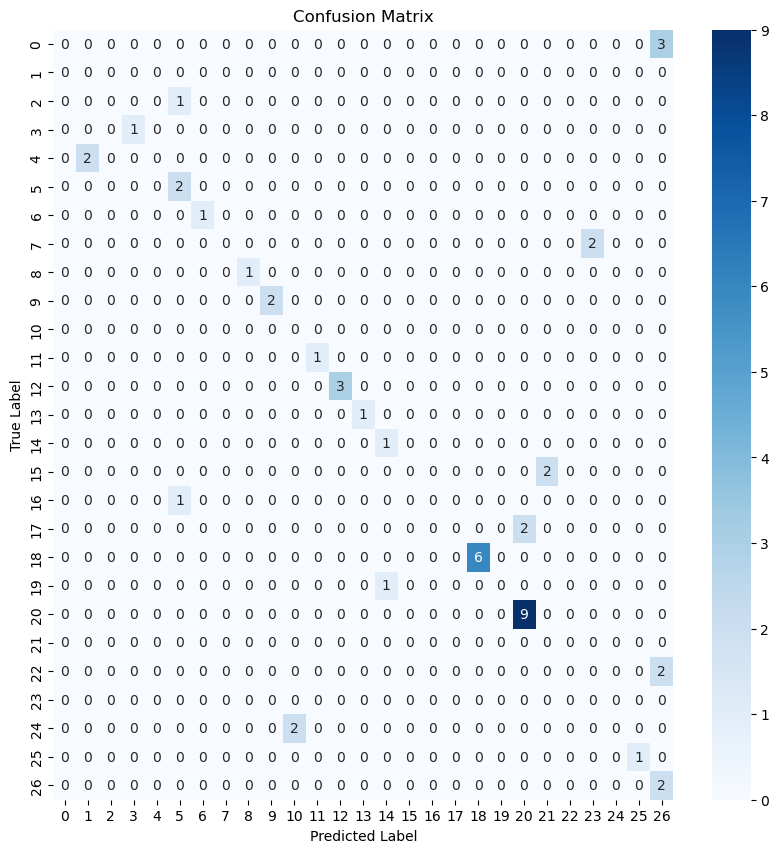

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Model with encoded data (skills, industries, brief taxonomy, locations)

# old code

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

# List of columns to be encoded
columns_to_encode = [
    "Sub Brief Taxonomy",
    "Main Brief Taxonomy",
    "Agency Skills",
    "Agency Industries"
]

# Function to extract values enclosed in parentheses
def extract_labels(s):
    s = s.replace('\t', ',') 
    return re.findall(r'\((.*?)\)', s)

# Preprocess each column and use MultiLabelBinarizer
for column in columns_to_encode:
    # Apply extract_labels to the column
    df[column] = df[column].apply(extract_labels)
    
    # Initialize the MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    
    # Transform the column and create a new DataFrame with the encoded values
    df_encoded = pd.DataFrame(mlb.fit_transform(df[column]), columns=mlb.classes_)
    
    # Optionally, you can add a prefix to the columns to keep track of the original column name
    df_encoded.columns = [f'{column}_{cls}' for cls in df_encoded.columns]
    
    # Concatenate the encoded DataFrame to the original DataFrame
    df = pd.concat([df, df_encoded], axis=1)
    
    # Optionally, you can drop the original column
    df.drop(column, axis=1, inplace=True)


In [9]:
# Print the names of the columns
df.columns

Index(['index', 'Brief Name', 'Client', 'Shortlisted Agency',
       'Service Description', 'Agency Description', 'Agency services',
       'Other Services', 'Vision', 'Industry Experience',
       ...
       'Agency Industries_Retail', 'Agency Industries_Scale-up',
       'Agency Industries_Start-up',
       'Agency Industries_Supply_Chain_and_Storage',
       'Agency Industries_Technology', 'Agency Industries_Telecommunications',
       'Agency Industries_Transportation',
       'Agency Industries_Travel_and_Tourism', 'Agency Industries_Utilities',
       'Agency Industries_and_Mining'],
      dtype='object', length=204)

In [10]:
df1 = df.copy()
columns_to_drop = [
    'Service Description',
    'Agency Description', 'Agency services', 'Other Services',
    'Vision', 'Industry Experience', 'Status', 'Winning Agency', 
    "Project extension with same agency",
    "Client selected agency themselves from marketplace",
    "Right geography / time zone",
    "Strong skill set match",
    "Deep / relevant sector expertise",
    "Good cultural fit",
    "Right price level",
    "Strong track record"
]

# Drop the columns
df1 = df1.drop(columns=columns_to_drop)

In [11]:
df1.head()

,index,Brief Name,Client,Shortlisted Agency,AgencyLocations_Australia,AgencyLocations_United Kingdom,AgencyLocations_United States,BriefRegion_australia,BriefRegion_united kingdom,BriefRegion_united states,...,Agency Industries_Retail,Agency Industries_Scale-up,Agency Industries_Start-up,Agency Industries_Supply_Chain_and_Storage,Agency Industries_Technology,Agency Industries_Telecommunications,Agency Industries_Transportation,Agency Industries_Travel_and_Tourism,Agency Industries_Utilities,Agency Industries_and_Mining
0,0,Awards applications x5,AXA,Boost Awards,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Awards applications x5,AXA,Reed Words,0,1,0,0,1,0,...,1,1,1,0,1,1,0,1,1,0
2,1,Awards applications x5,AXA,Reed Words,0,0,1,0,1,0,...,1,1,1,0,1,1,0,1,1,0
3,2,Countrywide broker video,AXA,Viewpoint Studios,0,1,0,0,1,0,...,1,0,1,1,1,1,1,1,0,1
4,3,Countrywide broker video,AXA,Shoreditch Design Studio,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model with encoded data (skills, industries, brief taxonomy, locations)

In [16]:
X = df1.drop(columns=['Shortlisted Agency', "Brief Name", "Client"]) 
y = pd.get_dummies(df1['Shortlisted Agency'])

from sklearn.model_selection import train_test_split

# Group df1 by 'Brief Name'
groups = df1.groupby('Brief Name')

# Split the groups into training and testing
train_groups, test_groups = train_test_split(list(groups), test_size=0.2, random_state=42)

# Concatenate the groups back into df1Frames
train_df1 = pd.concat([group for name, group in train_groups])
test_df1 = pd.concat([group for name, group in test_groups])

# Split X and y based on the train/test indices
X_train = X.loc[train_df1.index]
y_train = y.loc[train_df1.index]
X_test = X.loc[test_df1.index]
y_test = y.loc[test_df1.index]

In [17]:
from tensorflow.keras import layers, Model

# Define input size
input_size = X_train.shape[1]

# Input Layer
inputs = layers.Input(shape=(input_size,))

# Hidden Layers
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)

# Output Layer (number of agencies is the number of unique agencies)
outputs = layers.Dense(y_train.shape[1], activation='sigmoid')(x)

# Compile Model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy')


In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 1.3024
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.5505
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 0.3316
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 0.2057
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 0.1351
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.1139
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 0.1035
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0946
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0860
Epoch 10/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0789


In [19]:
# Predict on test set
predictions = model.predict(X_test)

# Pick a brief from the test set at random and see the recommendations
random_index = np.random.randint(0, len(X_test))
random_brief_predictions = predictions[random_index]

# Get the top-ranked agency indices
top_agency_indices = np.argsort(random_brief_predictions)[::-1]

# Print the recommended agencies
print("Recommended agencies for the selected brief:")
for idx in top_agency_indices[:5]: # Top 5 agencies
    print(y.columns[idx])


Recommended agencies for the selected brief:
Shoreditch Design Studio
How To Impact
Path Ventures
IE
In Marketing We Trust


In [20]:
# Assuming X, y and the train-test split are already defined as per your code snippet

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Model

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, 
                                                  random_state=42)



# Define input size
input_size = X_train.shape[1]

# Input Layer
inputs = layers.Input(shape=(input_size,))

# Hidden Layers
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)

# Output Layer (number of agencies is the number of unique agencies)
outputs = layers.Dense(y_train.shape[1], activation='sigmoid')(x)

# Compile Model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using training and validation data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
7/7 [==============================] - 0s 26ms/step - loss: 1.9617 - accuracy: 0.0103 - val_loss: 0.8791 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.0052 - val_loss: 0.4545 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3890 - accuracy: 0.0412 - val_loss: 0.3066 - val_accuracy: 0.0204
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.0515 - val_loss: 0.2110 - val_accuracy: 0.0408
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.1665 - accuracy: 0.0515 - val_loss: 0.1605 - val_accuracy: 0.0408
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.0515 - val_loss: 0.1405 - val_accuracy: 0.1429
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.2165 - val_loss: 0.1304 - val_accuracy: 0.2245
Epoch 8/10
7/7 [=========

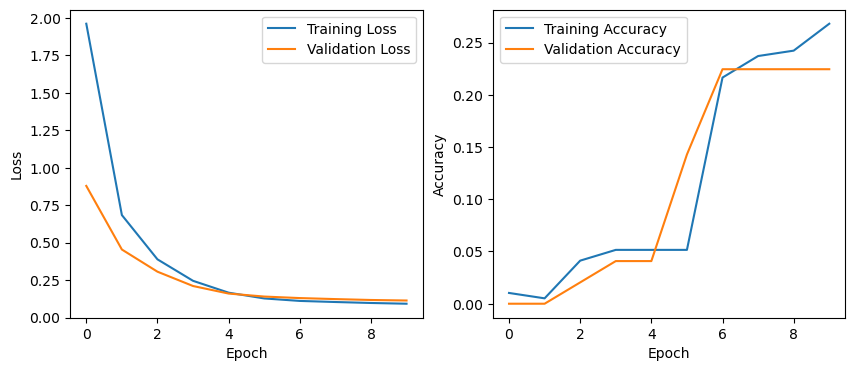

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
# Function to make recommendations
def get_recommendations(brief_index, top_n=10):
    brief_features = X_test.iloc[brief_index].values.reshape(1, -1)
    predicted_probs = model.predict(brief_features)[0]
    top_agencies_indices = np.argsort(predicted_probs)[::-1][:top_n]
    top_agencies = y.columns[top_agencies_indices]
    top_probabilities = predicted_probs[top_agencies_indices]
    
    recommendations = [(agency, prob) for agency, prob in zip(top_agencies, top_probabilities)]
    
    return recommendations

# Get recommendations for a specific brief in the test set 
brief_index = 45

# Get the brief name for the specified index
brief_name = df1.loc[test_df1.index[brief_index], 'Brief Name']

# Get recommendations for a specific brief in the test set
top_recommendations = get_recommendations(brief_index)

print(f"Top recommended agencies for the brief '{brief_name}':")
for agency, probability in top_recommendations:
    print(f"Agency: {agency}, Probability: {probability:.2f}")


Top recommended agencies for the brief 'V2 Aviva Advisor Prop Messaging':
Agency: xDesign, Probability: 0.22
Agency: GH05T Ltd., Probability: 0.15
Agency: Shoreditch Design Studio, Probability: 0.11
Agency: In Marketing We Trust, Probability: 0.09
Agency: off brand., Probability: 0.08
Agency: PALO IT, Probability: 0.08
Agency: Orange Panther Collective, Probability: 0.07
Agency: Innovate Live, Probability: 0.07
Agency: VERSA AGENCY, Probability: 0.05
Agency: Akcelo, Probability: 0.05


In [36]:
train_df1

,index,Brief Name,Client,Shortlisted Agency,AgencyLocations_Australia,AgencyLocations_United Kingdom,AgencyLocations_United States,BriefRegion_australia,BriefRegion_united kingdom,BriefRegion_united states,...,Agency Industries_Retail,Agency Industries_Scale-up,Agency Industries_Start-up,Agency Industries_Supply_Chain_and_Storage,Agency Industries_Technology,Agency Industries_Telecommunications,Agency Industries_Transportation,Agency Industries_Travel_and_Tourism,Agency Industries_Utilities,Agency Industries_and_Mining
242,183,Brand refresh,MA Financial Group,Houston Group,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
160,123,Chat & Chatbot,CFS,VERSA AGENCY,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
143,111,Video Animation,Biffa,SAND visuals,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
144,111,Video Animation,Biffa,SAND visuals,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
145,112,Video Animation,Biffa,InspoHub Ltd,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,202,Front End Web Design,Oxford Properties,xDesign,0,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
309,246,Social Media Veezu,Veezu,GH05T Ltd.,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
310,246,Social Media Veezu,Veezu,GH05T Ltd.,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
311,247,Social Media Veezu,Veezu,Nonsensical,0,1,0,0,1,0,...,1,1,0,0,1,1,0,1,0,0


In [37]:
from sklearn.metrics import classification_report

# Predict the probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
threshold = 0.5  # You can adjust this threshold based on your needs
y_pred = (y_pred_probs > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, y_pred, target_names=y.columns)
print(report)


                                     precision    recall  f1-score   support

                         2050London       0.00      0.00      0.00         0
                                2CV       0.00      0.00      0.00         4
                             Akcelo       0.00      0.00      0.00         3
                              Ampel       0.00      0.00      0.00         1
                             Apadmi       0.00      0.00      0.00         0
                              Apex1       0.00      0.00      0.00         0
                      Balmer Agency       0.00      0.00      0.00         0
                              Blicx       0.00      0.00      0.00         1
                  Blood Orange Film       0.00      0.00      0.00         0
                      Blue Feathers       0.00      0.00      0.00         1
                       Boost Awards       0.00      0.00      0.00         0
                        Buddy Media       0.00      0.00      0.00         

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# New model

In [38]:
# from sklearn.model_selection import train_test_split

# # Define the features and the target variable
# X = df1.drop(['Brief Name', 'Client', 'Shortlisted Agency'], axis=1)
# y = df1['Shortlisted Agency']

# # Split the df1 into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Optionally, you can further split the training set into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


In [39]:
# from keras.layers import Embedding, Input, Flatten, Multiply
# from keras.models import Model

# # Define the size of the embedding
# embedding_size = 10

# # Define input layers
# client_input = Input(shape=(1,), dtype='int32', name='client_input')
# agency_input = Input(shape=(1,), dtype='int32', name='agency_input')

# # Create embeddings for clients and agencies
# client_embedding = Embedding(input_dim=len(df1['Client'].unique()), output_dim=embedding_size)(client_input)
# agency_embedding = Embedding(input_dim=len(df1['Shortlisted Agency'].unique()), output_dim=embedding_size)(agency_input)

# # Flatten the embeddings
# client_embedding = Flatten()(client_embedding)
# agency_embedding = Flatten()(agency_embedding)

# # Multiply the embeddings (element-wise)
# gmf_output = Multiply()([client_embedding, agency_embedding])

# # Define the GMF model
# gmf_model = Model([client_input, agency_input], gmf_output)


In [40]:
# from keras.layers import Concatenate, Dense

# # Concatenate the embeddings
# mlp_input = Concatenate()([client_embedding, agency_embedding])

# # Add one or more dense layers
# mlp_output = Dense(64, activation='relu')(mlp_input)
# mlp_output = Dense(32, activation='relu')(mlp_output)

# # Define the MLP model
# mlp_model = Model([client_input, agency_input], mlp_output)


In [41]:
# # Concatenate the outputs of GMF and MLP
# neumf_input = Concatenate()([gmf_output, mlp_output])

# # Add one or more dense layers
# neumf_output = Dense(32, activation='relu')(neumf_input)
# neumf_output = Dense(1, activation='sigmoid')(neumf_output) # Final ranking score

# # Define the NeuMF model
# neumf_model = Model([client_input, agency_input], neumf_output)


## content based filtering component

In [46]:
# # Extract the content-based features
# content_features = df1.drop(['Brief Name', 'Client', 'Shortlisted Agency'], axis=1)

In [47]:
# from keras.layers import Dense, Input
# from keras.models import Model

# # Define input layer using shape of X_train
# content_input = Input(shape=(X_train.shape[1],), name='content_input')

# # Define the DNN layers
# dnn_output = Dense(128, activation='relu')(content_input)
# dnn_output = Dense(64, activation='relu')(dnn_output)

# # Define the DNN model
# dnn_model = Model(content_input, dnn_output)


In [48]:
# from keras.layers import Concatenate, Dense

# # Concatenate the outputs of NeuMF and DNN
# hybrid_input = Concatenate()([neumf_output, dnn_output])

# # Add one or more dense layers
# hybrid_output = Dense(32, activation='relu')(hybrid_input)
# hybrid_output = Dense(y_train.nunique(), activation='softmax')(hybrid_output) # Predicting agencies

# # Define the hybrid model
# hybrid_model = Model([client_input, agency_input, content_input], hybrid_output)

# # Compile the model
# hybrid_model.compile(optimizer='adam', 
#                      loss='sparse_categorical_crossentropy',
#                      metrics=['accuracy'])


In [49]:
# # Train the model
# hybrid_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


In [26]:
# from sklearn.preprocessing import LabelEncoder

# client_encoder = LabelEncoder()
# agency_encoder = LabelEncoder()

# clients = client_encoder.fit_transform(df1['Client'])
# agencies = agency_encoder.fit_transform(df1['Shortlisted Agency'])

# # Splitting these into training, validation, and test sets
# client_train, client_test, agency_train, agency_test = train_test_split(clients, agencies, test_size=0.2, random_state=42)
# client_train, client_val, agency_train, agency_val = train_test_split(client_train, agency_train, test_size=0.25, random_state=42)


In [27]:
# # Prepare the input arrays for training
# train_input = [client_train, agency_train, X_train]

# # Prepare the input arrays for validation
# val_input = [client_val, agency_val, X_val]


In [50]:
# # Train the model with the proper input arrays
# hybrid_model.fit(train_input, y_train, epochs=10, batch_size=32, validation_data=(val_input, y_val))


In [51]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

X = df1.drop(columns=['Shortlisted Agency', "Brief Name", "Client"]) 
y = pd.get_dummies(df1['Shortlisted Agency'])

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
input_shape = X_train.shape[1]


In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Input Layer
model.add(Dense(128, activation='relu', input_shape=(input_shape,)))

# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model to check the architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               23808     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 84)                2772      
                                                                 
Total params: 36,916
Trainable params: 36,916
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
8/8 [==============================] - 0s 21ms/step - loss: 5.9615 - accuracy: 0.0000e+00 - val_loss: 4.5060 - val_accuracy: 0.0159
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3786 - accuracy: 0.0200 - val_loss: 4.3264 - val_accuracy: 0.0952
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2802 - accuracy: 0.2120 - val_loss: 4.3373 - val_accuracy: 0.2063
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1936 - accuracy: 0.2320 - val_loss: 4.2513 - val_accuracy: 0.2222
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0926 - accuracy: 0.2640 - val_loss: 4.2496 - val_accuracy: 0.2222
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9496 - accuracy: 0.2640 - val_loss: 4.1132 - val_accuracy: 0.2222
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8116 - accuracy: 0.2760 - val_loss: 4.0546 - val_accuracy: 0.2222
Epoch 8/50
8/8 [=============

In [58]:
# Select an unseen brief (for example, the first one from the validation set)
unseen_brief = X_val.iloc[0].values.reshape(1, -1)

# Predict the probabilities for each agency
probs = model.predict(unseen_brief)

# Get the top "n" agency indices
n = 10 # You can choose any number for "n"
top_n_indices = probs[0].argsort()[-n:][::-1]

# Get the agency names and probabilities from the indices
top_n_agencies_with_probs = [(y.columns[i], probs[0][i]) for i in top_n_indices]

# Print the recommendations with probabilities
print("Top", n, "recommended agencies:")
for agency, prob in top_n_agencies_with_probs:
    print(f"Agency: {agency}, Probability: {prob*100:.2f}%")


Top 10 recommended agencies:
Agency: Shoreditch Design Studio, Probability: 100.00%
Agency: Akcelo, Probability: 0.00%
Agency: Wonderful, Probability: 0.00%
Agency: Josephmark, Probability: 0.00%
Agency: Houston Group, Probability: 0.00%
Agency: Balmer Agency, Probability: 0.00%
Agency: SLIK, Probability: 0.00%
Agency: The Bang, Probability: 0.00%
Agency: Ellipsis, Probability: 0.00%
Agency: The Park, Probability: 0.00%


In [59]:
from sklearn.preprocessing import LabelEncoder

# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Accuracy:', val_accuracy)

# Predict the probabilities on validation set
y_pred_probs = model.predict(X_val)

# Get the class labels from probabilities
y_pred = [y.columns[i] for i in np.argmax(y_pred_probs, axis=1)]

# Convert one-hot encoded y_val to class labels
y_true = y_val.idxmax(axis=1)

# Find the unique labels present in y_true and y_pred
unique_labels = np.unique(np.concatenate([y_true, y_pred]))

# Generate Classification Report
report = classification_report(y_true, y_pred, labels=unique_labels)
print(report)


2/2 [==============================] - 0s 2ms/step - loss: 2.3098 - accuracy: 0.7937
Validation Accuracy: 0.7936508059501648
                          precision    recall  f1-score   support

              2050London       0.00      0.00      0.00         1
                  Akcelo       1.00      1.00      1.00         1
                  Apadmi       0.00      0.00      0.00         1
                   Blicx       0.00      0.00      0.00         1
       Blood Orange Film       0.00      0.00      0.00         0
           Blue Feathers       1.00      0.50      0.67         2
             Buddy Media       0.67      1.00      0.80         2
            CreateFuture       1.00      1.00      1.00         1
                   Croud       1.00      1.00      1.00         1
               Dark Blue       0.00      0.00      0.00         1
         Daughter Studio       0.00      0.00      0.00         0
              GH05T Ltd.       0.75      1.00      0.86         3
         Good In

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda/envs/Python3/

In [60]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Accuracy:', val_accuracy)


2/2 [==============================] - 0s 2ms/step - loss: 2.3098 - accuracy: 0.7937
Validation Accuracy: 0.7936508059501648


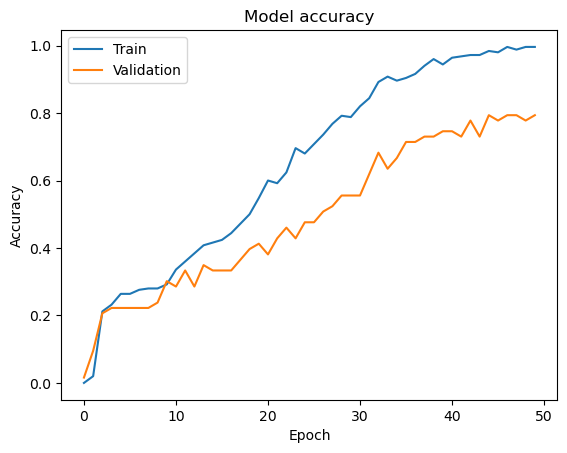

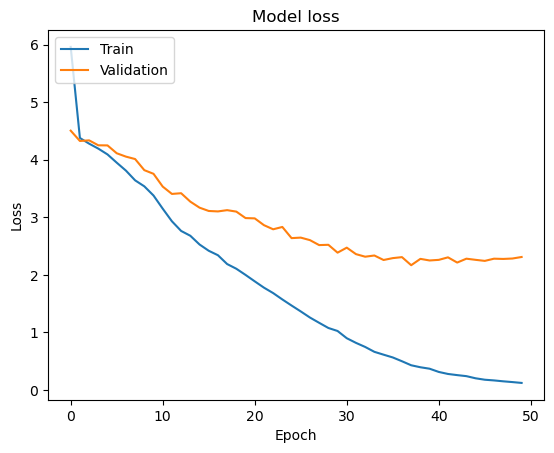

In [61]:
# Visualize Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Siamese network

In [71]:
import pandas as pd
# Determine unique agencies and briefs
unique_agencies = df1['Shortlisted Agency'].unique()
unique_briefs = df1['Brief Name'].unique()

# Create synthetic negative examples
negative_examples = []
for brief in unique_briefs:
    shortlisted_agencies = df1[df1['Brief Name'] == brief]['Shortlisted Agency'].values
    not_shortlisted_agencies = [agency for agency in unique_agencies if agency not in shortlisted_agencies]

    # Pair the brief with not shortlisted agencies
    for agency in not_shortlisted_agencies:
        negative_example = {'Brief Name': brief, 'Shortlisted Agency': agency, 'Matched': 0}
        # Add encoded features corresponding to the brief and agency if needed
        negative_examples.append(negative_example)

# Add the negative examples to the original dataframe
negative_examples_df = pd.DataFrame(negative_examples)
df1 = pd.concat([df1, negative_examples_df], ignore_index=True)


In [72]:
import pandas as pd

# Assuming all original entries are shortlisted agencies
df1['Matched'] = 1

# Determine unique agencies and briefs
unique_agencies = df1['Shortlisted Agency'].unique()
unique_briefs = df1['Brief Name'].unique()

# Create synthetic negative examples
negative_examples = []
for brief in unique_briefs:
    shortlisted_agencies = df1[df1['Brief Name'] == brief]['Shortlisted Agency'].values
    not_shortlisted_agencies = [agency for agency in unique_agencies if agency not in shortlisted_agencies]

    # Pair the brief with not shortlisted agencies
    for agency in not_shortlisted_agencies:
        negative_example = {'Brief Name': brief, 'Shortlisted Agency': agency, 'Matched': 0}
        # Add encoded features corresponding to the brief and agency if needed
        negative_examples.append(negative_example)

# Add the negative examples to the original dataframe
negative_examples_df = pd.DataFrame(negative_examples)
df1 = pd.concat([df1, negative_examples_df], ignore_index=True)

from sklearn.model_selection import train_test_split

# Select the encoded features and target
features = df1.drop(columns=['Shortlisted Agency', "Brief Name", "Client", "Matched"])
target = df1['Matched']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [74]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [75]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [76]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
257/257 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/20
257/257 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
257/257 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
257/257 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
257/257 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
257/257 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
257/257 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

In [77]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


65/65 [==============================] - 0s 694us/step - loss: nan - accuracy: 0.0000e+00
Test Loss: nan
Test Accuracy: 0.0


In [10]:
positive_pairs = []
negative_pairs = []

for brief_name in df['Brief Name'].unique():
    # Get all the agencies shortlisted for this brief
    shortlisted_agencies = df[df['Brief Name'] == brief_name]['Shortlisted Agency'].tolist()

    # Get all the agencies not shortlisted for this brief
    not_shortlisted_agencies = df[(df['Brief Name'] != brief_name) | (~df['Shortlisted Agency'].isin(shortlisted_agencies))]['Shortlisted Agency'].tolist()

    # Generate positive and negative pairs
    for agency in shortlisted_agencies:
        encoded_features = df[(df['Brief Name'] == brief_name) & (df['Shortlisted Agency'] == agency)].iloc[0, 3:].tolist() # Assuming the encoded features start from column index 3
        positive_pairs.append((encoded_features, agency))

        # Select a random not-shortlisted agency for negative sample
        negative_agency = random.choice(not_shortlisted_agencies)
        negative_pairs.append((encoded_features, negative_agency))


In [11]:
# Assuming positive_pairs and negative_pairs contain pairs of encoded features
# for briefs and agencies respectively

# Concatenate positive and negative pairs
pairs = positive_pairs + negative_pairs

# Create labels: 1 for positive pairs, 0 for negative pairs
labels = [1] * len(positive_pairs) + [0] * len(negative_pairs)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pairs, labels, test_size=0.20, random_state=42)

# Separate the pairs into two separate arrays: one for briefs, one for agencies
X_train_briefs = np.array([pair[0] for pair in X_train])
X_train_agencies = np.array([pair[1] for pair in X_train])

X_test_briefs = np.array([pair[0] for pair in X_test])
X_test_agencies = np.array([pair[1] for pair in X_test])

y_train = np.array(y_train)
y_test = np.array(y_test)

# Check the shapes to make sure they are consistent
assert X_train_briefs.shape == X_train_agencies.shape
assert X_test_briefs.shape == X_test_agencies.shape

# Now you can proceed with defining and compiling the Siamese network as in your provided code snippet


AssertionError: 

In [25]:
import numpy as np

# Assuming positive_pairs and negative_pairs are created as above

# Concatenate positive and negative pairs
pairs = positive_pairs + negative_pairs

# Create labels: 1 for positive pairs, 0 for negative pairs
labels = [1] * len(positive_pairs) + [0] * len(negative_pairs)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pairs, labels, test_size=0.20, random_state=42)

# Separate the pairs into two separate arrays: one for briefs, one for agencies
X_train_briefs = np.array([pair[0] for pair in X_train])
X_train_agencies = np.array([pair[1] for pair in X_train])

X_test_briefs = np.array([pair[0] for pair in X_test])
X_test_agencies = np.array([pair[1] for pair in X_test])

y_train = np.array(y_train)
y_test = np.array(y_test)

# Your data is now ready for training a Siamese neural network



import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

# Define the sub-network in this function
def create_base_network(input_shape):
    """Base network to be shared (eq. to feature extraction).
    """
    input = layers.Input(shape=input_shape)
    x = layers.Dense(128, activation='relu')(input)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128, activation='relu')(x)
    return Model(input, x)

input_shape = X_train_briefs.shape[1:]
base_network = create_base_network(input_shape)

# Create the left input and point to the base network
input_a = layers.Input(shape=input_shape)
vect_output_a = base_network(input_a)

# Create the right input and point to the base network
input_b = layers.Input(shape=input_shape)
vect_output_b = base_network(input_b)

# Calculate the L1 distance between the two vector outputs
output = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))([vect_output_a, vect_output_b])
output = layers.Dense(1, activation='sigmoid')(output)

# Connect the inputs with the outputs
model = Model([input_a, input_b], output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 201)]        0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 201)]        0           []                               
                                                                                                  
 model_4 (Functional)           (None, 128)          58880       ['input_9[0][0]',                
                                                                  'input_10[0][0]']               
                                                                                                  
 lambda_3 (Lambda)              (None, 128)          0           ['model_4[0][0]',          

In [26]:
# Split the training pairs into separate lists
X_train_briefs = [pair[0] for pair in X_train]
X_train_agencies = [pair[1] for pair in X_train]

# Convert them to NumPy arrays
X_train_briefs = np.array(X_train_briefs)
X_train_agencies = np.array(X_train_agencies)
y_train = np.array(y_train)

# Perform the same for the test data
X_test_briefs = [pair[0] for pair in X_test]
X_test_agencies = [pair[1] for pair in X_test]
X_test_briefs = np.array(X_test_briefs)
X_test_agencies = np.array(X_test_agencies)
y_test = np.array(y_test)


In [29]:
 # Split the positive and negative pairs into training and testing sets
positive_pairs_train, positive_pairs_test = train_test_split(positive_pairs, test_size=0.20, random_state=42)
negative_pairs_train, negative_pairs_test = train_test_split(negative_pairs, test_size=0.20, random_state=42)

# Concatenate the positive and negative pairs
pairs_train = positive_pairs_train + negative_pairs_train
pairs_test = positive_pairs_test + negative_pairs_test

# Shuffle the pairs and create the training and testing sets
random.shuffle(pairs_train)
random.shuffle(pairs_test)

X_train_briefs = np.array([pair[0] for pair in pairs_train])
X_train_agencies = np.array([get_encoded_features_for_agency(pair[1]) for pair in pairs_train]) # You'll need to define this function to get the encoded features for the agency
y_train = np.array([1] * len(positive_pairs_train) + [0] * len(negative_pairs_train))

X_test_briefs = np.array([pair[0] for pair in pairs_test])
X_test_agencies = np.array([get_encoded_features_for_agency(pair[1]) for pair in pairs_test]) # You'll need to define this function to get the encoded features for the agency
y_test = np.array([1] * len(positive_pairs_test) + [0] * len(negative_pairs_test))


NameError: name 'get_encoded_features_for_agency' is not defined

In [27]:

# Train the model
history = model.fit(
    [X_train_briefs, X_train_agencies], y_train,
    batch_size=128,
    epochs=20, 
    validation_data=([X_test_briefs, X_test_agencies], y_test)
)

# Evaluate the model
evaluation = model.evaluate([X_test_briefs, X_test_agencies], y_test)
print(f"Test loss: {evaluation[0]}\nTest accuracy: {evaluation[1]}")


Epoch 1/20


ValueError: in user code:

    File "/opt/anaconda/envs/Python3/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda/envs/Python3/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda/envs/Python3/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda/envs/Python3/lib/python3.9/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda/envs/Python3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda/envs/Python3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "model_4" (type Functional).
    
    Input 0 of layer "dense_8" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None
